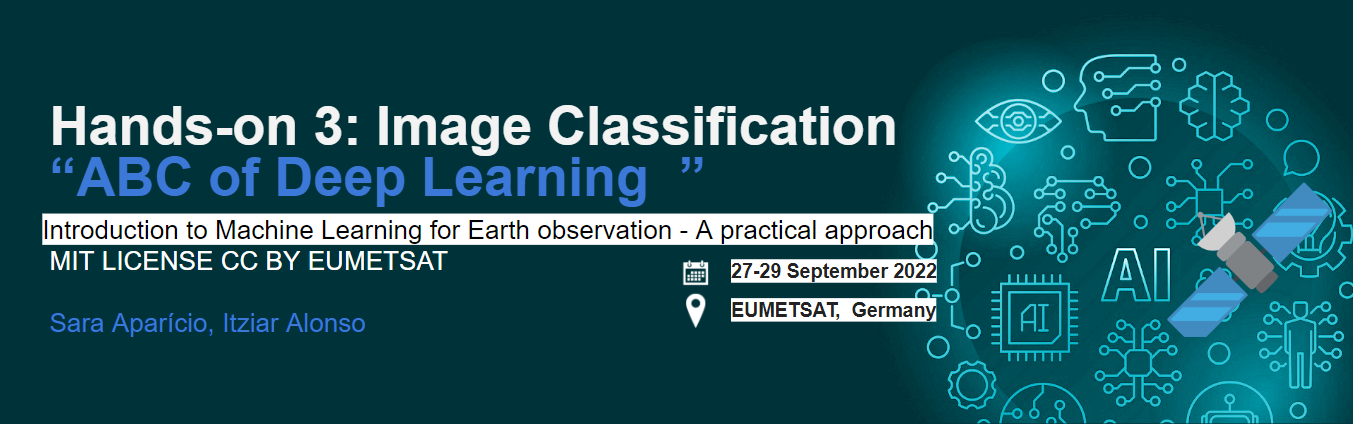

## <span style="color:red">PARTICIPANT'S VERSION: Make a copy and rename it</span> 👀

# Image classification of meterological events (circulation patterns) using SEVIRI data (*years 2005 to 2009*) using two types of deep learning architectures: MLP and CNN
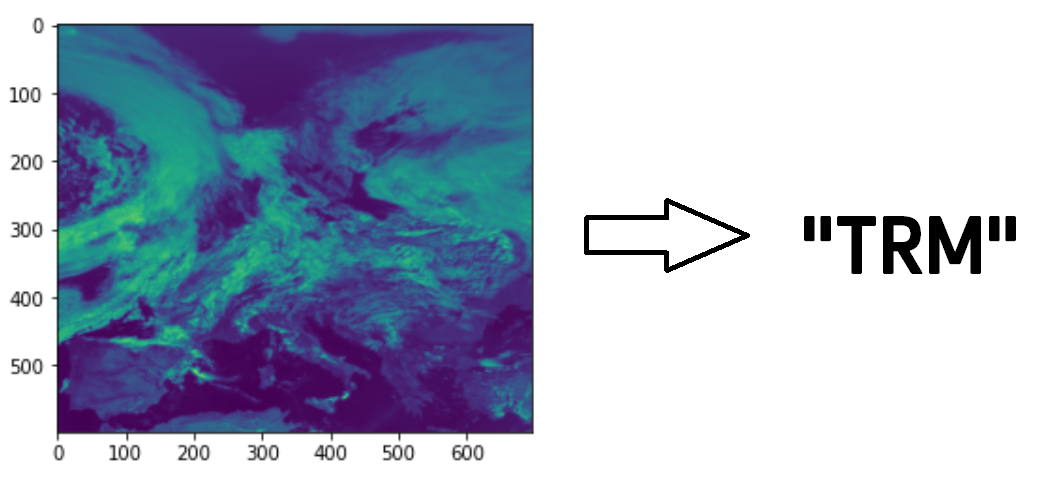


### The goal of this notebook is to develop a basic data pipeline with MLP, a CNN and a pre-trained CNN that can be easily applied to new image recognition projects. Some concepts developed here:

- Which libraries to use for deep learning projects
- Load the the dataset to make it readable by a MLP or CNN:
        Data inspecting
        Dataset normalization 
        One-hot encoding values 
- Creation of a basic MLP classifier using the tf.Keras Sequential API
- Compilation the model
- Training/fitting the model
- Evaluation of the model performanace

After reading this tutorial, you will...

- Have an idea about the history of Multilayer Perceptrons and CNN.
- Be able to code and test an MLP with Keras
- Understand why it's better to use Convolutional layers in addition to Dense ones when working with image data.

## 0 - Importing Libraries

In [ ]:
#Importing libraries
import rasterio as rio
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
from osgeo import gdal, gdal_array
from tqdm import tqdm
from PIL import Image
import numpy as np
import pandas as pd
from numpy import asarray

- **TensorFlow** is an open source library created for Python by the Google Brain team. TensorFlow compiles many different algorithms and models together, enabling the user to implement deep neural networks for use in tasks like image recognition/classification and natural language processing. TensorFlow is a powerful framework that functions by implementing a series of processing nodes, each node representing a mathematical operation, with the entire series of nodes being called a "graph".

- **Keras** is a high-level Deep Learning API that allow to easily build, train, evaluate and execute all sorts of neural netowrks. It uses TensorFlow's functions underneath and was designed with user-friendliness and modularity as its guiding principles. In practical terms, Keras makes implementing the many powerful but often complex functions of TensorFlow as simple as possible, and it's configured to work with Python without any major modifications or configuration.

In [ ]:
#Importing Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image

from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils\

from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data exploration

### 1.1. - Target/Output data (Katalog Der Grosswetterlagen Europas)
Selection of years **2005 to 2009** From https://www.pik-potsdam.de/en/output/publications/pikreports/.files/pr119.pdf
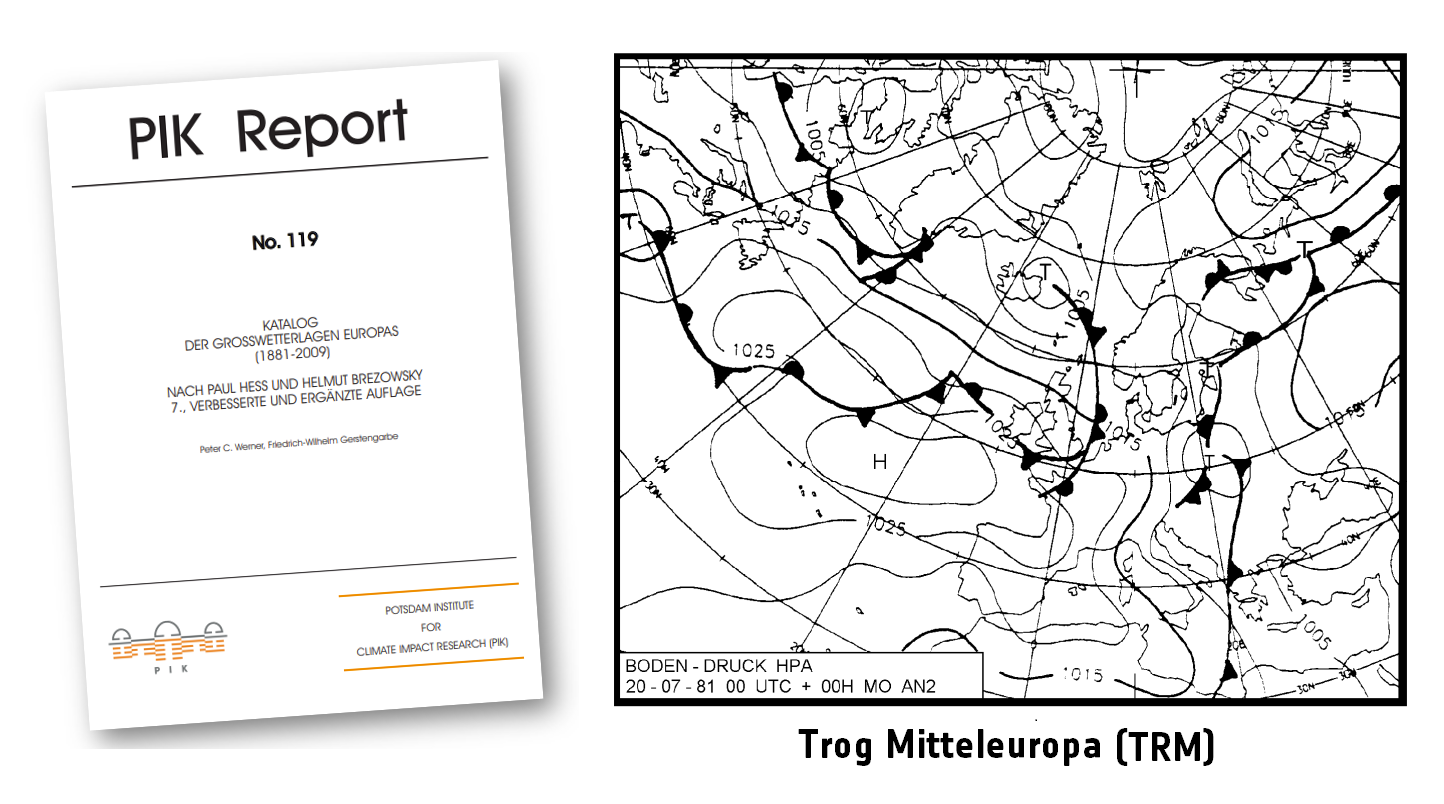

First step is to collect these classifications and create a **list of strings** for the entire period (2005-2009). Each item of this list corresponds to the meterological classification of each day:

In [ ]:
## Converting all classifications into lists of strings for each month of each year

## 2005
Jan2005= ['WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'HM', 'HM', 'HM', 'HM', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'NZ']
Feb2005= ['NZ', 'NZ', 'NZ', 'NZ', 'BM', 'BM', 'BM', 'BM', 'BM', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNA', 'HNA', 'HNA']
Mar2005= ['TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'WA', 'WA', 'WA', 'WA', 'WA', 'HM', 'HM', 'HM', 'HM', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ']  
Apr2005= ['HM', 'HM', 'HM', 'HM', 'HM', 'HM', 'TRW', 'TRW', 'TRW', 'TRW', 'BM', 'BM', 'BM', 'BM', 'HNZ', 'HNZ', 'HNZ', 'HNZ', 'HNZ', 'HNZ', 'HNA', 'HNA', 'HNA', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'BM'] 
May2005= ['BM', 'BM', 'BM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'WZ', 'WZ', 'WZ', 'WZ', 'TRM', 'TRM', 'TRM', 'SWA', 'SWA', 'SWA', 'SWA', 'SWA', 'SWA', 'SWA', 'SWA', 'SWA', 'SWZ', 'SWZ', 'SWZ'] 
Jun2005= ['WZ', 'WZ',  'WZ', 'WZ', 'WZ', 'WZ', 'HB', 'HB', 'HB', 'HB', 'HB', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'HM', 'HM', 'HM', 'HM', 'HM', 'HM', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW'] 
Jul2005= ['TRW', 'TRW', 'TRW', 'TRW', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ']  
Aug2005= ['SWZ', 'BM', 'BM', 'BM', 'BM', 'TRM', 'TRM', 'TRM', 'TRM', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'HM', 'HM', 'HM', 'SEZ', 'SEZ', 'SEZ', 'SEZ', 'SEZ', 'TRW', 'TRW', 'TRW', 'BM', 'BM', 'BM', 'BM', 'BM'] 
Sep2005= ['BM', 'BM', 'BM', 'BM', 'BM', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ']
Oct2005= ['WZ',  'WZ', 'BM', 'BM', 'BM', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'U', 'HNFA', 'HNFA', 'HNFA', 'HNFA', 'HNFA', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SA', 'SA', 'SA', 'SA', 'SA'] 
Nov2005= ['SWZ',  'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'BM', 'BM', 'BM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM']  
Dec2005= ['TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'TRM', 'TRM', 'TRM', 'TRM', 'BM', 'BM', 'BM', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM'] 

## App
year2005 = Jan2005 + Feb2005 + Mar2005 + Apr2005 + May2005 + Jun2005 + Jul2005 + Aug2005 + Sep2005 + Oct2005 + Nov2005 + Dec2005

#2006
Jan2006=[ 'TRM', 'TRM', 'TRM', 'TRM', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'HM', 'HM', 'HM', 'HM', 'HM', 'HM', 'HM', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'HM', 'HM','HM', 'HM', 'HB', 'HB', 'HB', 'HB', 'HB', 'HB']
Feb2006=[ 'HB', 'HB', 'HB', 'HB', 'U', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'BM', 'BM', 'BM', 'BM', 'WW', 'WW', 'WW', 'WW', 'WW', 'WW', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'TRM', 'TRM', 'TRM']
Mar2006=[ 'TRM', 'TRM', 'WS', 'WS', 'WS', 'WS', 'WS', 'WS', 'WS', 'WS', 'WS', 'HFA', 'HFA', 'HFA', 'HFA', 'HFA', 'HNA', 'HNA', 'HNA', 'HNA', 'BM', 'BM', 'BM','SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ' ,'SWZ']
Apr2006=[ 'WZ', 'WZ', 'WZ', 'WZ', 'BM', 'BM', 'BM', 'BM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'SEZ', 'SEZ', 'SEZ', 'SEZ', 'SEZ', 'SEZ', 'TRM', 'TRM', 'TRM', 'TRM']
May2006=[ 'TRM', 'TRM', 'SEA', 'SEA', 'SEA' ,'SEA', 'HNFA', 'HNFA', 'HNFA', 'HNA', 'HNA', 'HNA', 'BM' ,'BM', 'BM', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'TRW', 'TRW' ,'TRW', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'TRM', 'TRM']
Jun2006=[ 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'HB', 'HB', 'HB', 'HM', 'HM', 'HM', 'HM', 'HM', 'BM', 'BM', 'BM', 'BM', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ' ,'SWZ', 'SWZ', 'BM', 'BM', 'BM']
Jul2006=[ 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'TRW', 'TRW', 'TRW', 'BM', 'BM', 'BM', 'BM', 'BM', 'HB', 'HB', 'HB', 'HB', 'HB', 'HB', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'TRW', 'TRW','TRW', 'TRW', 'TRW']
Aug2006=[ 'TRW', 'TRW', 'TM', 'TM', 'TM', 'TM', 'NZ', 'NZ', 'NZ', 'NZ', 'TM', 'TM', 'TM', 'TM', 'TM', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'WS', 'WS', 'WS', 'WS', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM']
Sep2006=[ 'WZ' ,'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'HB', 'HB', 'HB', 'SA', 'SA', 'SA', 'SA', 'SA', 'SEZ', 'SEZ', 'SEZ', 'SEZ', 'BM', 'BM', 'BM', 'SA', 'SA', 'SA', 'TRW', 'TRW', 'TRW', 'SWA', 'SWA', 'SWA']
Oct2006=[ 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ','HM', 'HM', 'HM', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'SA', 'SA', 'SA', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'BM', 'BM', 'BM', 'BM']
Nov2006=[ 'NZ', 'NZ', 'NZ', 'NZ', 'NWA', 'NWA', 'NWA', 'NWA', 'NWA', 'NWA', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'SWZ', 'SWZ', 'SWZ' ,'SWZ', 'SWZ', 'WZ' ,'WZ', 'WZ', 'WZ', 'SWZ', 'SWZ', 'SWZ', 'BM', 'BM', 'BM', 'BM']
Dec2006=[ 'BM', 'BM', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ' ,'TRM', 'TRM' ,'TRM', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'HB', 'HB', 'HB', 'HB', 'HB', 'HB', 'HB', 'HM', 'HM','HM', 'HM', 'WZ', 'WZ']

year2006 = Jan2006 + Feb2006 + Mar2006 + Apr2006 + May2006 + Jun2006 + Jul2006 + Aug2006 + Sep2006 + Oct2006 + Nov2006 + Dec2006

#2007
Jan2007=[ 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WA', 'WA', 'WA', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'TRM', 'TRM', 'TRM', 'TRM', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ']
Feb2007=[ 'NWZ', 'HB', 'HB', 'HB', 'WZ', 'WZ', 'WZ', 'WZ', 'WS', 'WS', 'WS', 'WS', 'WS', 'WS', 'WS', 'SEA', 'SEA', 'SEA', 'BM', 'BM', 'BM', 'WW', 'WW', 'WW', 'WW', 'WW', 'WZ', 'WZ']
Mar2007=[ 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'NWZ', 'NWZ', 'NWZ', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA']
Apr2007=[ 'SEA', 'SEA', 'HB', 'HB', 'HB', 'HB', 'HB', 'NWA', 'NWA', 'NWA', 'HM', 'HM', 'HM', 'HM', 'HM', 'HM', 'HB', 'HB', 'HB', 'HB', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'HNA', 'HNA', 'HNA', 'HNA']
May2007=[ 'HNA', 'HNA', 'U', 'SEZ', 'SEZ', 'SEZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'TRM', 'TRM', 'TRM', 'TRM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM' ,'TRW', 'TRW', 'TRW', 'TRW', 'SEZ', 'SEZ' ,'SEZ' ]
Jun2007=[ 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'U', 'SWZ', 'SWZ', 'SWZ','SWZ', 'SWZ', 'SWZ', 'SWZ', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'TRM', 'TRM', 'TRM', 'WZ', 'WZ'] 
Jul2007=[ 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'TRM', 'TRM', 'TRM', 'BM', 'BM', 'BM', 'BM', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ' ]
Aug2007=[ 'WZ', 'WZ', 'WZ', 'HM', 'HM', 'HM', 'U', 'TM', 'TM', 'TM', 'TM', 'BM', 'BM', 'BM', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'TM', 'TM', 'TM', 'TM', 'TM', 'NWA', 'NWA', 'NWA', 'NWA', 'NWA', 'NWA', 'NWZ' ]
Sep2007=[ 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'HB','HB', 'HB', 'HB', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'BM', 'BM', 'BM', 'BM', 'TRW', 'TRW', 'TRW', 'TM', 'TM', 'TM', 'TM' ]
Oct2007=[ 'TRW', 'TRW', 'TRW', 'TRW', 'BM', 'BM','BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'SWA', 'SWA', 'SWA', 'HB', 'HB', 'HB', 'HB', 'HFZ', 'HFZ', 'HFZ', 'HFZ', 'HFZ', 'BM', 'BM', 'BM', 'BM' ,'BM' ]
Nov2007=[ 'BM', 'BM', 'BM', 'BM', 'BM', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'U', 'BM', 'BM', 'BM', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'U', 'NWZ', 'NWZ', 'NWZ', 'WZ', 'WZ', 'WZ' ]
Dec2007=[ 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'TRM', 'TRM', 'TRM','TRM', 'NEA', 'NEA', 'NEA', 'HM', 'HM', 'HM', 'HM', 'HM', 'HM','HM', 'HM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'TRM', 'TRM']

year2007 = Jan2007 + Feb2007 + Mar2007 + Apr2007 + May2007 + Jun2007 + Jul2007 + Aug2007 + Sep2007 + Oct2007 + Nov2007 + Dec2007

#2008
Jan2008=['TRM', 'SEA', 'SEA', 'SEA', 'WW', "WW", "WW", "WW", "WW", "SWA", "SWA", "SWA", "SWA", "SWA", "SWA", "SWA", "WZ", "WZ", "WZ", "WZ", "WZ", "WZ", "BM", "BM", "BM", "NWZ", "NWZ", "NWZ", "U", "WZ", "WZ"]
Feb2008 = ["WZ", "WZ", "WZ", "WZ", "WZ", "WZ", "WZ" ,"HM", "HM", "HM", "HM" ,"HM" ,"HNA", "HNA" ,"HNA", "U", "NWA" ,"NWA", "NWA" ,"WZ", "WZ", "WZ", "WZ" ,"WZ", "WZ", "WZ" ,"WZ" ,"WZ", "WZ"] 
Mar2008=["WZ" ,"WZ", 'WZ', "WZ", "BM", "BM", "BM", "BM", "BM", "WZ", "WZ", "WZ", "WZ", "WZ", "WZ", "WZ", "NZ", "NZ", "NZ", "TRM", "TRM", "TRM", "TRM", "TRM", "TRM", "WZ", "WZ", "WZ", "WZ", "WZ", "WZ"]
Apr2008=['WZ', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'TRW', 'TRW', 'TRW', 'U', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'BM', 'BM', 'BM', 'BM', 'TB', 'TB', 'TB']
May2008=['TB', 'TB', 'HFA', 'HFA', 'HFA', 'HFA', 'HM', 'HM', 'HM', 'HM', 'HM', 'HNA', 'HNA', 'HNA', 'U', 'TRW', 'TRW', 'TRW', 'NEA', 'NEA', 'NEA', 'NEA', 'NEA', 'NEA', 'NEZ', 'NEZ', 'NEZ', 'SEZ', 'SEZ', 'SEZ', 'SEZ']
Jun2008 =['HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'BM', 'BM', 'BM', 'BM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'WA', 'WA', 'WA', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WA', 'WA']
Jul2008 = ['WA', 'TRW', 'TRW', 'TRW', 'TB', 'TB', 'TB', 'TB', 'TB', 'TB', 'SWZ', 'SWZ', 'SWZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'TRM', 'TRM', 'TRM', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ']
Aug2008 = ['WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'TRM', 'TRM', 'TRM', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'BM', 'BM', 'BM', 'BM', 'BM']
Sep2008 = ['BM', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'BM', 'BM', 'BM', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'NEZ', 'NEZ', 'NEZ', 'NEZ', 'NEZ', 'NEZ', 'NEZ', 'NEZ', 'BM', 'BM', 'BM', 'WZ', 'WZ']
Oct2008 = ['WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'BM', 'BM', 'BM', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW']
Nov2008 = ['TRW', 'TRW', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'BM', 'BM', 'BM', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'BM', 'BM', 'BM', 'SZ', 'SZ']
Dec2008 = ['SZ', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'SA', 'SA', 'SA', 'TRM', 'TRM', 'TRM', 'TRM', 'NWA', 'NWA', 'NWA', 'NWA', 'NWA', 'U', 'HM', 'HM', 'HM', 'HM', 'HM', 'HM']

year2008 = Jan2008 + Feb2008 + Mar2008 + Apr2008 + May2008 + Jun2008 + Jul2008 + Aug2008 + Sep2008 + Oct2008 + Nov2008 + Dec2008

#2009
Jan2009= ['HM', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'BM', 'BM', 'BM', 'BM', 'BM', 'SWA', 'SWA', 'SWA', 'SWA', 'HM', 'HM', 'HM', 'WW', 'WW', 'WW', 'WW', 'WW', 'WW', 'WS', 'WS', 'WS', 'HM', 'HM', 'HM', 'HFA', 'HFA'] 
Feb2009= ['HFA', 'HFA', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'TRM', 'TRM', 'TRM', 'TRM', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'HB', 'HB', 'HB', 'HB', 'HB', 'HB', 'HB', 'U', 'NWZ', 'NWZ', 'NWZ']
Mar2009= ['TRW', 'TRW', 'TRW', 'TRW', 'SEZ', 'SEZ', 'SEZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'NA', 'NA', 'NA', 'U ','NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'NWZ', 'SWZ', 'SWZ', 'SWZ', 'BM']
Apr2009= ['BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'TRW', 'TRW', 'TRW', 'HM', 'HM', 'HM', 'HM', 'HM', 'HM', 'HM', 'HNZ', 'HNZ', 'HNZ', 'BM', 'BM', 'BM', 'BM', 'BM', 'TRW', 'TRW', 'TRW', 'TRW', 'TRW', 'BM']
May2009= ['BM', 'BM', 'BM', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'HNZ', 'HNZ', 'HNZ', 'HNZ', 'HNZ', 'TB', 'TB', 'TB', 'TB', 'SWZ', 'SWZ', 'SWZ', 'BM', 'BM', 'BM', 'WZ', 'WZ', 'WZ', 'NEA', 'NEA', 'NEA'] 
Jun2009= ['NEA', 'NEA', 'NZ', 'NZ', 'NZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'NWZ', 'NWZ', 'NWZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'TRM', 'TRM', 'TRM', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ', 'HNFZ']
Jul2009= ['HNZ', 'HNZ', 'HNZ', 'TB', 'TB', 'TB', 'TB', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'WZ', 'WZ', 'WZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM']
Aug2009= ['BM', 'BM', 'BM', 'BM', 'HFA', 'HFA', 'HFA', 'HFA', 'HFA', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'WA', 'WA', 'WA']
Sep2009= ['TRW', 'TRW', 'TRW', 'TRM', 'TRM', 'TRM', 'BM', 'BM', 'BM', 'BM', 'HB', 'HB', 'HB', 'NEZ', 'NEZ', 'NEZ', 'NEZ', 'NEZ', 'BM', 'BM', 'BM', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WA', 'NWZ', 'NWZ']
Oct2009= ['NWZ', 'NWZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'HM', 'HM', 'HM', 'TRW', 'TRW', 'TRW', 'WZ', 'WZ', 'WZ', 'WZ', 'HM', 'HM', 'HM', 'HM']
Nov2009= ['HM', 'U', 'WS', 'WS', 'WS', 'TRW', 'TRW', 'TRW', 'TRM', 'TRM', 'TRM', 'TRM', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'SWA', 'SWA', 'SWA', 'SWA', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'WZ', 'TRW'] 
Dec2009= ['TRW', 'TRW', 'TRW', 'TRW', 'WW', 'WW', 'WW', 'WW', 'WW', 'WW', 'NEZ', 'NEZ', 'NEZ', 'NEZ', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'TRM', 'U', 'SWZ', 'SWZ', 'SWZ', 'SWZ', 'WS', 'WS', 'WS', 'WS', 'WS', 'WS'] 

year2009= Jan2009+ Feb2009+ Mar2009+ Apr2009+ May2009 +Jun2009 + Jul2009 + Aug2009 + Sep2009 + Oct2009 + Nov2009 + Dec2009

##
year05_09 = year2005+year2006+year2007+year2008+year2009

#print('Jan2005',len(Jan2005))
#print('Feb2005',len(Feb2005))
#print('Mar2005',len(Mar2005))
#print('Apr2005',len(Apr2005))
#print('May2005',len(May2005))
#print('Jun2005',len(Jun2005))
#print('Jul2005',len(Jul2005))
#print('Aug2005',len(Aug2005))
#print('Sep2005',len(Sep2005))
#print('Oct2005',len(Oct2005))
#print('Nov2005',len(Nov2005))
#print('Dec2005',len(Dec2005))

#print('January 06:',len(Jan2006))
#print('February 06:',len(Feb2006))
#print('March 06:',len(Mar2006))
#print('April 06:',len(Apr2006))
#print('May 06:',len(May2006))
#print('June 06:',len(Jun2006))
#print('July 06:',len(Jul2006))
#print('Augst 06:',len(Aug2006))
#print('September 06:',len(Sep2006))
#print('October 06:',len(Oct2006))
#print('November 06:',len(Nov2006))
#print('December 06:',len(Dec2006))

#print('January 07:',len(Jan2007))
#print('February 07:',len(Feb2007))
#print('March 07:',len(Mar2007))
#print('April 07:',len(Apr2007))
#print('May 07:',len(May2007))
#print('June 07:',len(Jun2007))
#print('July 07:',len(Jul2007))
#print('Augst 07:',len(Aug2007))
#print('September 07:',len(Sep2007))
#print('October 07:',len(Oct2007))
#print('November 07:',len(Nov2007))
#print('December 07:',len(Dec2007))

#print('January:',len(Jan2008))
#print('February:',len(Feb2008))
#print('March:',len(Mar2008))
#print('April:', len(Apr2008))
#print('May:', len(May2008))
#print('June:', len(Jun2008))
#print('July:', len(Jul2008))
#print('August:', len(Aug2008))
#print('September:', len(Sep2008))
#print('October:', len(Oct2008))
#print('November:', len(Nov2008))
#print('December:', len(Dec2008))

#print('January 09:',len(Jan2009))
#print('February 09:',len(Feb2009))
#print('March 09:',len(Mar2009))
#print('April 09:', len(Apr2009))
#print('May 09:',len(May2009))
#print('June 09:',len(Jun2009))
#print('July 09:',len(Jul2009))
#print('Augst 09:',len(Aug2009))
#print('September 09:',len(Sep2009))
#print('October 09:',len(Oct2009))
#print('November 09:',len(Nov2009))
#print('December 09:',len(Dec2009))

In [ ]:
# A debug to understand if size of years (amount of days per year) seem ok
print('No. of days per year>>> 2005:', len(year2005),
      '|  2006:', len(year2006),
      '|  2007:', len(year2007),
      '|  2008:', len(year2008),
      '|  2009:', len(year2009),
      '|  Sum:', len(year2005) + len(year2006) + len(year2007) + len(year2008) + len(year2009))
print('No. of days from 2005 to 2009:', len(year05_09))
print('No. of 3 images X each day from 2005 to 2009//total number of images in the folder:', (3*len(year2005) + 3*len(year2006) + 3*len(year2007) + 3*len(year2008) + 3*len(year2009)))

### 1.2 Predictor/Input data - SEVIRI image data 
#### Rectified (level 1.5) Meteosat Spinning Enhanced Visible and InfraRed Imager (SEVIRI) image data. 
High Rate SEVIRI image data consist of geographical arrays of various sizes of image pixels, each pixel containing 10 data bits, representing the **received radiation from the earth and its atmosphere in the 12 spectral channels**. Of these 12 spectral channels, **11 provide measurements with a resolution of 3 km** at the sub-satellite point with the 12th, the High Resolution Visible (HRV) channel, providing measurements with a resolution of 1 km. The data is transmitted as High Rate transmissions in 12 spectral channels. Level 1.5 image data corresponds to the geolocated and radiometrically pre-processed image data, ready for further processing, e.g. the extraction of meteorological products. More info at: https://navigator.eumetsat.int/product/EO:EUM:DAT:MSG:HRSEVIRI-IODC

The path for the original data is in the following directory:
**data/ml4eo/training_data/experiment_a/**

The path for a downscalled version of this data (which we will use) is here:
**/data/ml4eo/training_data/experiment_a/downsampled-rasterio-cubic/**

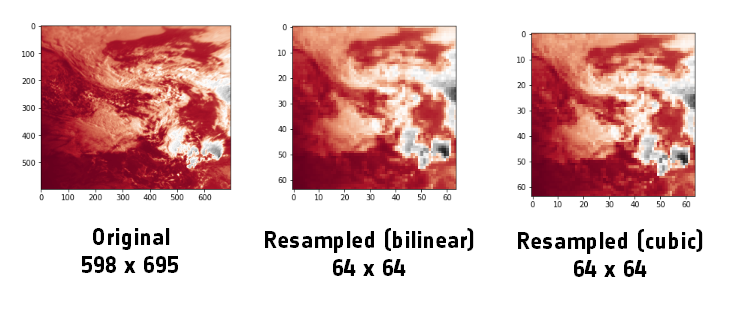

In [ ]:
# List with all files inside the path ending with *.tif 
#⚠️ Your code below: uncommnet and update with the right path
#ds = list(glob.glob("insert_here_the_path_to_the_dataset*.tif")) 


# Order by alpabhetic order with .sort()
# ⚠️ Your code here

print('Total sorted files:', len(ds))
#print('First 2 sorted files:', ds[int(len(ds)-2):int(len(ds))])
print('First 2 files:', ds[0:2])

### 1.2.1 Understanding size, bands of single file and the three different times: T06, T12 and T18 

In [ ]:
from rasterio.plot import show

fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(15,7))

# 🚨 IF WE USE THE ORIGINAL DATASET WE NEED TO CHANGE           48:56                  56:59             
show((rio.open(ds[114]), 1), ax=axr, cmap='RdGy', title=ds[114][75:83]+'  -  '+ds[114][83:86])
show((rio.open(ds[115]), 2), ax=axg, cmap='RdGy', title=ds[115][75:83]+'  -  '+ds[115][83:86])
show((rio.open(ds[116]), 3), ax=axb, cmap='RdGy', title=ds[116][75:83]+'  -  '+ds[116][83:86])

pyplot.show()

#Visualize one file and check the dimensions of file i
i = 1812 #79,55,43 da erro
img1 = rio.open(ds[i])
print('Size of a single file:',img1.shape)

img = gdal.Open(ds[i])
print ("Number of bands:", str(img.RasterCount))

print('/path filename on the foler:', ds[504])

### 1.2.2 Cleaning the dataset: selection of a single image/per date
##### Since it seemts that T06 and T18 do not provide images as good as T12 (see above), we will create a dataframe containing only T12, T06 an T18

In [ ]:
# For now we will temporarly use only every first date  
#eliminates files with repeated dates 
mylist = ds
list12 = []
list06 = []
list18 = []
i = 1
for i in range(len(mylist)-1):
    if mylist[i][75:83] != mylist[i-1][75:83]:  #48:56 - this range for the original dataset
            list06.append(mylist[i])     #list with all T06 images  
            list12.append(mylist[i+1])   #llist with all T12 images
            list18.append(mylist[i+2])     #list with all T18 images
print('Total T12 images :', len(list12))

In [ ]:
from rasterio.plot import show
fig, (axr, axg, axb, axl) = pyplot.subplots(1,4, figsize=(15,7))
show((rio.open(str(list12[94])), 1), ax=axr, cmap='seismic', title=list12[94][75:83]+'  -  '+list12[94][83:86])
show((rio.open(str(list12[95])), 2), ax=axg, cmap='seismic', title=list12[95][75:83]+'  -  '+list12[95][83:86])
show((rio.open(str(list12[96])), 3), ax=axb, cmap='seismic', title=list12[96][75:83]+'  -  '+list12[96][83:86])
show((rio.open(str(list12[97])), 4), ax=axl, cmap='seismic', title=list12[97][75:83]+'  -  '+list12[97][83:86])
print('                         ------------------>>>> T12 images <<<<-----------------------')
pyplot.show()

from rasterio.plot import show
fig, (axr, axg, axb, axl) = pyplot.subplots(1,4, figsize=(15,7))
show((rio.open(str(list06[94])), 1), ax=axr, cmap='seismic', title=list06[94][75:83]+'  -  '+list06[94][83:86])
show((rio.open(str(list06[95])), 2), ax=axg, cmap='seismic', title=list06[95][75:83]+'  -  '+list06[95][83:86])
show((rio.open(str(list06[96])), 3), ax=axb, cmap='seismic', title=list06[96][75:83]+'  -  '+list06[96][83:86])
show((rio.open(str(list06[97])), 4), ax=axl, cmap='seismic', title=list06[97][75:83]+'  -  '+list06[97][83:86])
print('                         ------------------>>>> T06 images <<<<-----------------------')
pyplot.show()

from rasterio.plot import show
fig, (axr, axg, axb, axl) = pyplot.subplots(1,4, figsize=(15,7))
show((rio.open(str(list18[30])), 1), ax=axr, cmap='seismic', title=list18[30][75:83]+'  -  '+list18[94][83:86])
show((rio.open(str(list18[31])), 2), ax=axg, cmap='seismic', title=list18[31][75:83]+'  -  '+list18[94][83:86])
show((rio.open(str(list18[32])), 3), ax=axb, cmap='seismic', title=list18[32][75:83]+'  -  '+list18[94][83:86])
show((rio.open(str(list18[1000])), 4), ax=axl, cmap='seismic', title=list18[97][75:83]+'  -  '+list18[94][83:86])
print('                         ------------------>>>> T18 images <<<<-----------------------')
pyplot.show()

In [ ]:
#Just to make sure that lenghts are correct
print('Number of classifications/days:', len(year05_09))
print('Number of images/days of T12:',len(list12))
print('Number of total images (T12+T06+T18):',len(list12)+len(list06)+len(list18))

## 1.3 Combining images paths and corresponding classification on a single dataframe

####  1.3.1 Creating 2 dataframes: containing T12 (and T06) images and corresponding classification of the day 

In [ ]:
# Create a dataframe for the entire list of classification year05_09 >>> pd.Dataframe()
df12 = #⚠️ Your code here
# Name the classification column as 'label' >>> df12.columns = []
df12.columns=  #⚠️ Your code here
# Add a column named as 'image' containing the list of filepaths for the T12 >>> df12['name of new column']= 
df12['image'] = #⚠️ Your code here

# Repeat the same for T06
df06 = #⚠️ Your code here
df06.columns= #⚠️ Your code here
df06['image'] = #⚠️ Your code here

# Stack the DataFrames on top of each other T06 + T12 >>> dtf1.append(dtf3, ignore_index = True))
df0612 = #⚠️ Your code here


print('Length of dataframe df12 is:', len(df12))
print('Length of dataframe df0612 is:', len(df0612))
print('--')
print('Visualizing dataframe with labels and filepaths of T12 + T06 images:')
df0612.head(3)

### 🚨 Defining which dataframe will be used (df06 , df12 or df0612!)

In [ ]:
df = #⚠️ Your code here . Select df12, or df06, or df0612
len(df)

#### 1.3.2 Adding an extra column associating a number to each label

In [ ]:
# Assigns a number to each unique value in the column of labels
names = df.label

# Assigns a number to each unique value in the column of labels
classes = pd.factorize(names)
classes = classes[0]
df['class'] = classes
dfLabel = df

df[706:711]

### 1.4 Further inspections 

#### 1.4.1 Visualizing images and corresponding label and class

In [ ]:
from rasterio.plot import show

fig, ((a, b, c, d),(e, f, g, h),(i, j, k, l)) = pyplot.subplots(3,4, figsize=(15,7))
show((rio.open(df['image'][1000]), 1), ax=a, cmap='seismic', title=df['label'][1000]+ "-" + str(df['class'][1000]))
show((rio.open(df['image'][1001]), 2), ax=b, cmap='seismic', title=df['label'][1001]+ "-" + str(df['class'][1001]))
show((rio.open(df['image'][1002]), 3), ax=c, cmap='seismic', title=df['label'][1002]+ " " + str(df['class'][1002]))
show((rio.open(df['image'][1003]), 4), ax=d, cmap='seismic', title=df['label'][1003]+ " " + str(df['class'][1003]))
show((rio.open(df['image'][1004]), 1), ax=e, cmap='seismic', title=df['label'][1004]+ " " + str(df['class'][1004]))
show((rio.open(df['image'][1005]), 2), ax=f, cmap='seismic', title=df['label'][1005]+ " " + str(df['class'][1005]))
show((rio.open(df['image'][1006]), 3), ax=g, cmap='seismic', title=df['label'][1006]+ " " + str(df['class'][1006]))
show((rio.open(df['image'][1007]), 4), ax=h, cmap='seismic', title=df['label'][1007]+ " " + str(df['class'][1007]))
show((rio.open(df['image'][1008]), 1), ax=i, cmap='seismic', title=df['label'][1008]+ " " + str(df['class'][1008]))
show((rio.open(df['image'][1009]), 2), ax=j, cmap='seismic', title=df['label'][1009]+ " " + str(df['class'][1009]))
show((rio.open(df['image'][1010]), 3), ax=k, cmap='seismic', title=df['label'][1010]+ " " + str(df['class'][1010]))
show((rio.open(df['image'][1011]), 4), ax=l, cmap='seismic', title=df['label'][1011]+ " " + str(df['class'][1011]))
print('------------------>>>> Images with corresponding classification <<<<-----------------------')
pyplot.show()

#### 1.4.2 How many labels are there to understand if there is data (im)balance

In [ ]:
#checking how many instances are inside each label/category
dfLabels = dfLabel.pivot_table(columns=['label'], aggfunc='size')

class_names = df['label'].unique()
class_names

In [ ]:
# Plot the number of instances per class
dfLabels.plot.bar()
plt.title("Distribution of images per class of train dataset")
plt.ylabel("Count");

# Print the number of instances per class.
#⚠️  Uncomment the code below
#print(pd.Series(count, index=class_names))

### 1.3.2 Plotting histograms 
This can be a way to clean the dataset, i.e., eliminate images that are not good

In [ ]:

# https://towardsdatascience.com/targeting-and-removing-bad-training-data-8ccdac5e7cc3
#https://pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/
    

### 1.3.3 Data Augmentation 
So, to get more data, we just need to make minor alterations to our existing dataset. Minor changes such as flips or translations or rotations. Our neural network would think these are distinct images anyway.

A cute example of what looks like:

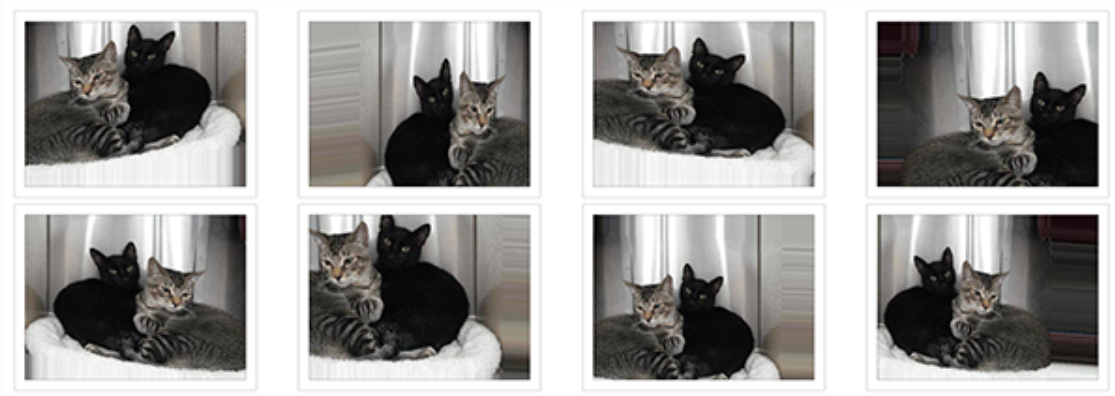

## 2. Loading and preprocessing the data (to prepare for training the model)

### 2.1 Loading into X: Creating a loop to convert tif images into a list of arrays (to be used for training models)

In [ ]:
#Creating a series with all the images paths
imagesDf = df.image

# Creates a list of all images as array
# Going throuh each image path, opens it as image, converts to numpy array and adds to the list
imageList = []

for i in range(len(imagesDf)):
    # Open each image
    img = rio.open(imagesDf[i])
    # Read each imange >>  img.read([insert list of bands]) and choose these bands [5,6,9]
    img = #⚠️ Your code here
    # convert each image to an array >>> asarray( name of the image)
    imageAsArray = #⚠️ Your code here
    # Add it to a list, creating a list of array >>> name of the list.append( image converted as array)
    #⚠️ Your code here

# Convert the list into a numpy array
X = np.array(imageList)

#convert shape to become: length , xsize , ysize , number of bands
X = X.reshape(X.shape[0], X.shape[2], X.shape[3], X.shape[1]) 

### 2.2 Loading into y: creating an array of list of integer

In [ ]:
#Creating a df with all the labels
dfClass = dfLabel['class']  

#converting to integer > need to convert to string first and then an integer
dfClass = dfClass.astype(str).astype(int)
y = np.array(dfClass)
print('Check lenght of X:',len(X))
print('Check lenght of y:',len(y))


In [ ]:
dfClass = dfLabel['class']

### 2.1.1 Separate into training and test data

In [ ]:
from sklearn.model_selection import train_test_split

# Separate X and y into train and test
# Use train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test =   #⚠️ Your code here

In [ ]:
a = X_train.shape[0]
b = X_train.shape[1]
c = X_train.shape[2]
d = X_train.shape[3]
print(a, b, c, d)

### 2.1.2 Normalizing the data & and make sure the formats of X and y are ok !

In [ ]:
# normalize the data by dividing the X train and y train by 255. 
# Convert it first into a numpy array with np.array(name_of_the_data)

X_train =  #⚠️ Your code here
X_test =  #⚠️ Your code here

print('X train shape is',X_train.shape)
print('X train type is',X_train.dtype)
print('y train shape is',y_train.shape)
print('y train type is',y_train.dtype)

print('X test shape is',X_test.shape)
print('X test type is',X_test.dtype)
print('y test shape is',y_test.shape)
print('y test type is',y_test.dtype)

### 2.1.3 One-hot enconde the values
For **categorical variables** where no ordinal relanship exists as is this case (e.g. 'TRM','WW', etc), one-hot encoding is applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value. Since we have here *ten categories*, therefore 10 binary variables are needed. A **"1"** value is placed in the binary variable of a certain variable, and **"0"** is assigned to the others.
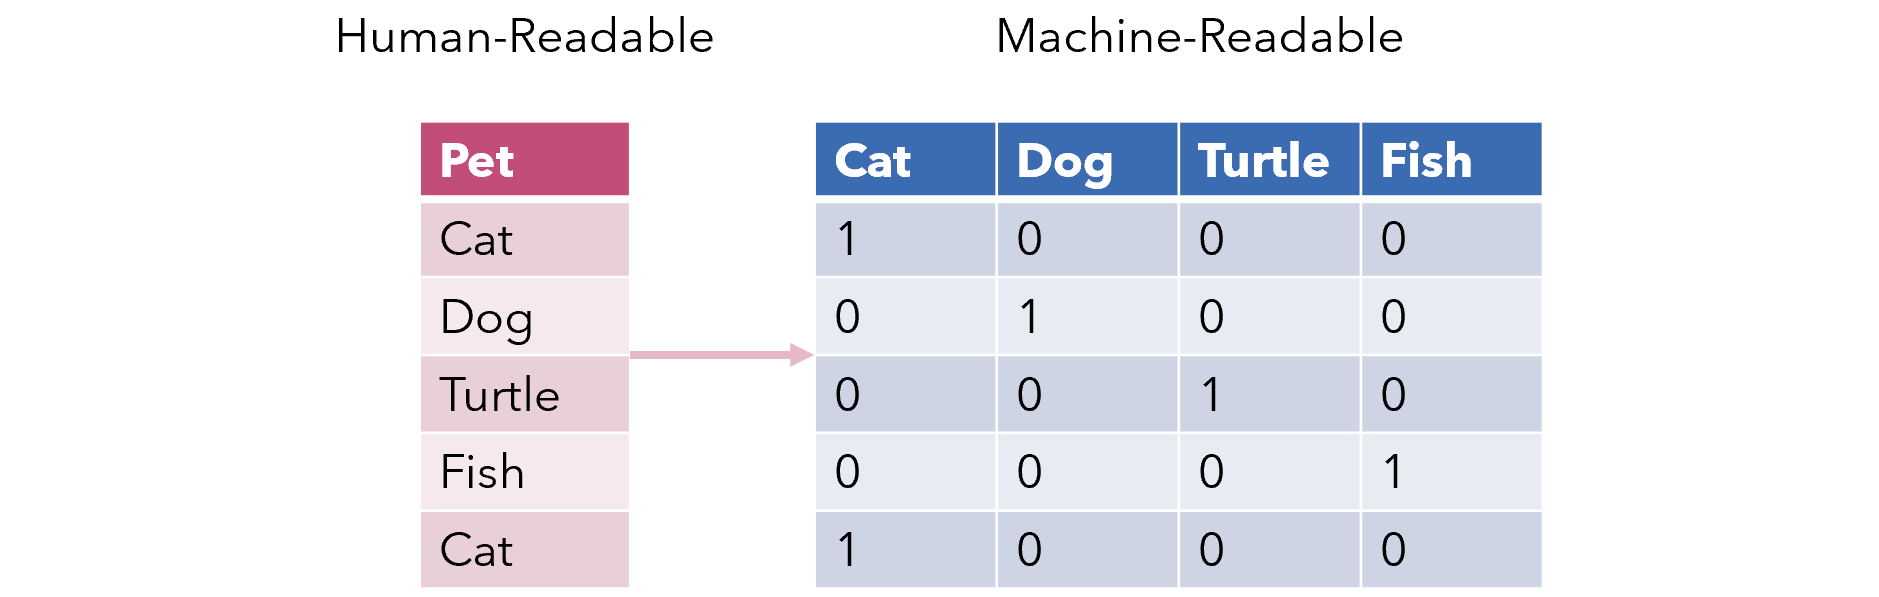
Summary:

- Categorical data is defined as variables with a finite set of label values.
- Most machine learning algorithms require numerical input and output variables.
- One hot encoding is used to convert categorical data to integer data.

In [ ]:
# One-hot encoding with >>> to_categorical(name_of_the_data,number of categories)
y_train =  #⚠️ Your code here
y_test=  #⚠️ Your code here
#class_num = y_test.shape[1]

print(y_train)
#print(class_num)

## 3. Creating a MLP model with two hidden layers

A multilayer perceptron (MLP) is a cascade of single-layer perceptrons. We can summarize the types of layers in an MLP as follows:
- **Input Layer:** Input variables, sometimes called the visible layer.
- **Hidden Layers(s):** Layers of nodes between the input and output layers. There may be one or more of these layers.
- **Output Layer:** A layer of nodes that produce the output variables.
We will perform a classification MLP with two hidden layers:

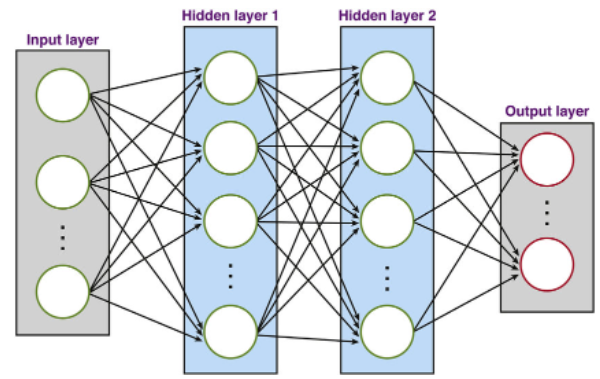

**The Sequential model API** is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it. The Sequential model API is great for developing deep learning models in most situations, but it also has some limitations.


There are no universal rules for choosing an activation fucntion for hidden layers - however the activation function for the output layer will greately depend on the type of prediction required. Below there are some of the most widely used activations functions for hidden layers (according to the type of NN) and acitvation functions for output layers (according to the ML task). 

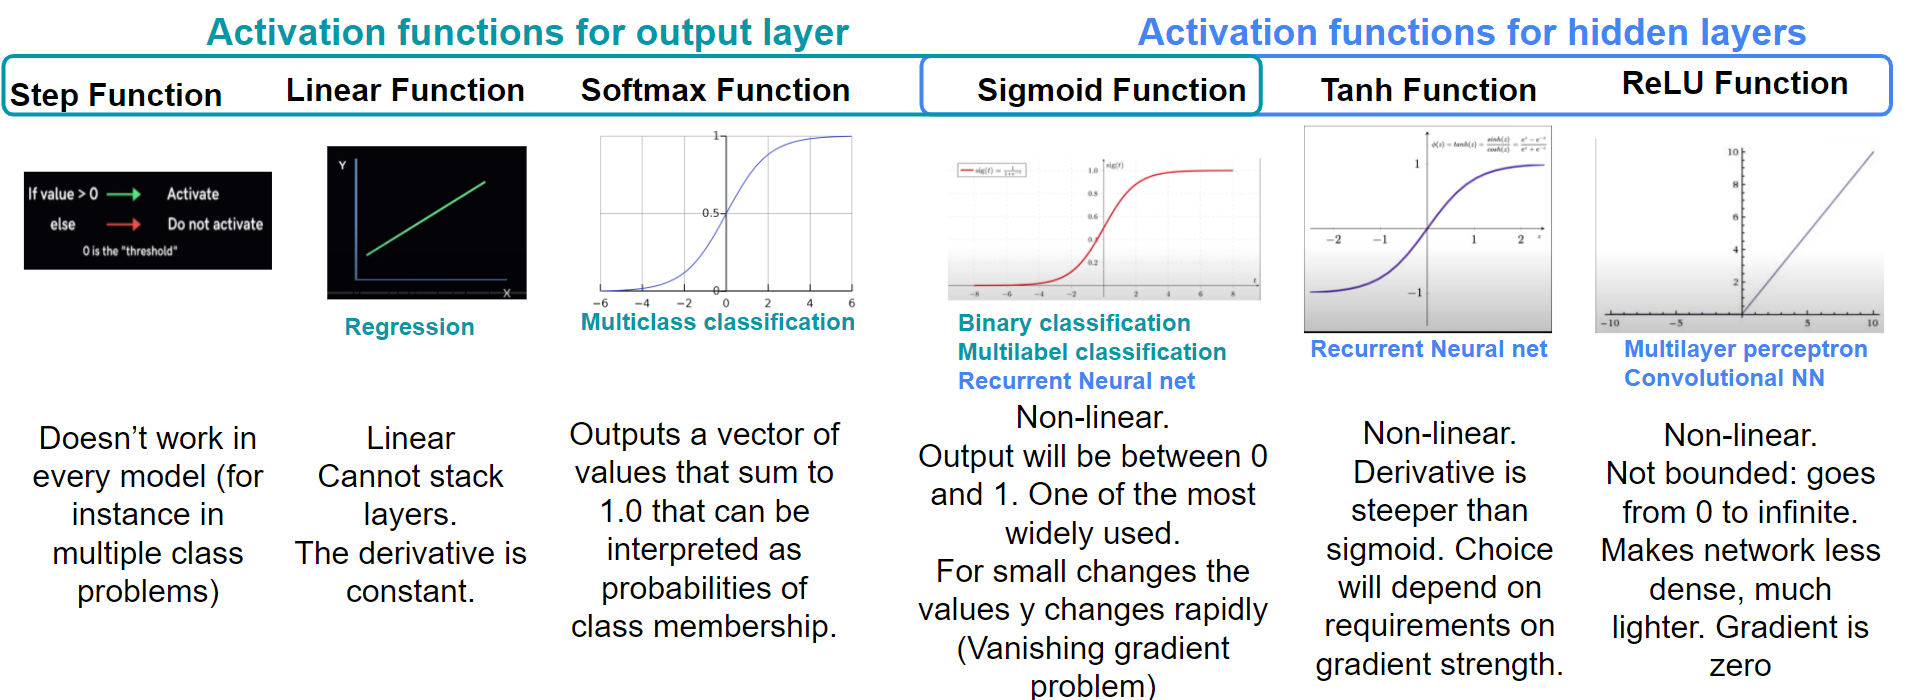

### 3.1 Build the multi-layer perceptron (MLP) model 

In [ ]:
#Create a sequential model: this is the simplest kind of Keras model for NN 
#that are just compsed of a single stack of layers connected sequentially

model = keras.Sequential()


#add input layer
#example: model.add(keras.layers.Flatten(input_shape=(width,height,number of bands)))
#⚠️ Your code here

#add two hiden layers
#example: model.add(keras.layers.Dense(number_of_neurons, activation= 'name of activation'))
#⚠️ Your code here
#⚠️ Your code here

#finalize with output layer
#note: number of neurons should be = number of classes and activation function should be one 
#⚠️ Your code here

### 3.2 Model's summary
The model's **sumary()** method displays all the model's layers, including their name (which is automatic unless it is specified), its output shape (**None** means the batch size can be anything), and its numbers of parameters.

Note that the first hidden layer has 12288 x 400 connection weights, plus 400 bias terms - wich adds up to 7373400 parameters. This gives the model a lot of flexibility to fit the training data, but also it also means that the model runs the risk of **overfitting**.

In [ ]:
#visualize de model, displaying all the models' layers
#Includes layers names and its number of parameters

#visualize the summary of the model with model.summary()
#⚠️ Uncommnet the code below
#model.summary()

### 3.4 Compiling the model
After the model is created, compiling the model specifies the **loss function** and **optmizer** to use. Optionally you can also specify a list of extra metrics to compute during training and evaluation.
The loss function, optmizers and metrics can be selected from:
- http://keras.io/losses
- http://keras.io/optimizers
- http://keras.io/metrics

In [ ]:
#compile the model with: 
# loss function: categorical_crossentropy - since have one target probability per class for each instance, we used one-hot vector, 
# stochastic gradient descent - keras will use the backpropagation algorithm
# it is a classifier, hence it's useful to measure the accuracy metric

 #⚠️ Complete with your code below
model.compile(loss=, optimizers=, metrics=   )

### 3.5 Training the model
Use X_train and y_train to fit the model. Selection of **epochs**.
An **epoch** is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches (especially when the amount of data is very large). Some people use the term iteration loosely and refer to putting one batch through the model as an iteration.   

If the batch size is the whole training dataset then the number of epochs is the number of iterations. For practical reasons, this is usually not the case. Many models are created with more than one epoch. The general relation where dataset size is d, number of epochs is e, number of iterations is i, and batch size is b would be d*e = i*b. 

Determining how many epochs a model should run to train is based on many parameters related to both the data itself and the goal of the model, and while there have been efforts to turn this process into an algorithm, often a deep understanding of the data itself is indispensable.

In [362]:
#from keras.preprocessing.image import ImageDataGenerator
#datagen = ImageDataGenerator(rotation_range=90)
#datagen.fit(X_train)

In [ ]:
print("Fit model on training data:")
# Fit the model >> model.fit(name of training data, name of label data, epochs=15) 
history = #⚠️ Your code here
 #validation is passed for monitoring loss and metrics at the end of each epoch         

In [ ]:
## Now, if you would like to for example plot loss curve during training 
##(i.e. loss at the end of each epoch) you can do it like this
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 4. Evaluating the model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()#.set_ylim(0,1) #sets vertical range to [0-1]
plt.show

In [ ]:
 #⚠️ Uncomment the code below
#model.evaluate(X_test,y_test)
#print("Accuracy: %.2f%%" % (scores[1]*100))

### 4.1 Using the model to make predictions
We can use now predict to make predictions on new instances. We can use for example, the first three instances from the validation set:

In [ ]:
# change number of image_index (e.g. from 1 to 73), to see different predictions
image_index = 7

#plot prediction
pred = model.predict(X_test[image_index].reshape(1,64,64,3))
predicted_class = pred.argmax()
class_nm = class_names[predicted_class]
print(class_nm)

#plot image
#plt.imshow(((X_test[image_index]).reshape(64,64,3)), cmap='seismic',vmin=0, vmax=255) #.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
#pyplot.show()


#visualize the image
pyplot.imshow(img1.read(1))
pyplot.show()

In [1]:
#X_test[image_index].reshape(1,64,64,3).astype(np.uint8)

## TO-DO (next steps to improve):
- **Improving training dataset** 
    - Prepare to read T06 + T12 (double the amount of data)
    - Change the number of bands being read (increase the
    - Remove bad images (e.g. creat histogram that will eliminate some "bad" images)
    - Perform data augmentation (from the results of last point)
 
    
- **Improving model by tuning the hyperparameters**
    - 1 Check the **learning rate**
    - 2 Try another **optimizer**
    - 3 Change **number of layers** 
    - 4 Change the **number of neurons** per layer
    - 5 Change the type of **activation functions** to use for each hidden layer


- **Try a different model approach**
    - Ex. Build a CNN
    - Use a pre-trained CNN

# Extras 🐰

### A - Another way of building a MLP
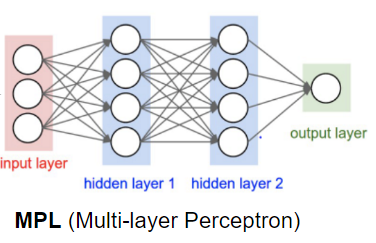

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 3)),
    keras.layers.Dense(number of neurons, activation='name of activation'),
    keras.layers.Dense(number of neurons, activation='name of activation'),      
    keras.layers.Dense(number of classes, activation='nambe of final activation')     
 ])

### B - Building a Convolutional Neural Network (CNN)
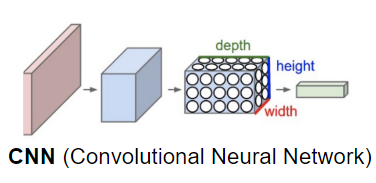

#### B.1 Build the architecture/layers of the CNN

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [64, 64,3]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(len(dfLabel), activation ='softmax')
])

#### B.2 Compile the model (choose the optimizer, the loss function and the metrics)

In [ ]:
model2.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

#### B.3 Fit the model (train the model with the training data)

In [ ]:
print("Fit model on training data:")
history = model2.fit(X_train,y_train, epochs=10)  #change epoch to 30

#### B.4 Plot accuracy and loss 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()#.set_ylim(0,1) #sets vertical range to [0-1]
plt.show

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(64, 64, 3)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(len(dfLabel), activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20) 

### C - Building/Using a pre-trained CNN VGG16
#### C.1 Using a pre-trained VGG16
This architecture was originally trained on the Imagenet dataset (https://image-net.org/). Keras provides a function to preprocess our dataset as the ImageNet in case we want to take advantage of the pretrained weights (however in this example we are not using that function). 

However, we will **initialize the weights as they come pre-trained** instead of initializing them randomly of following a traditional trasnfer learning approach using the preprocessing function and gradually adapting the model to the dataset.
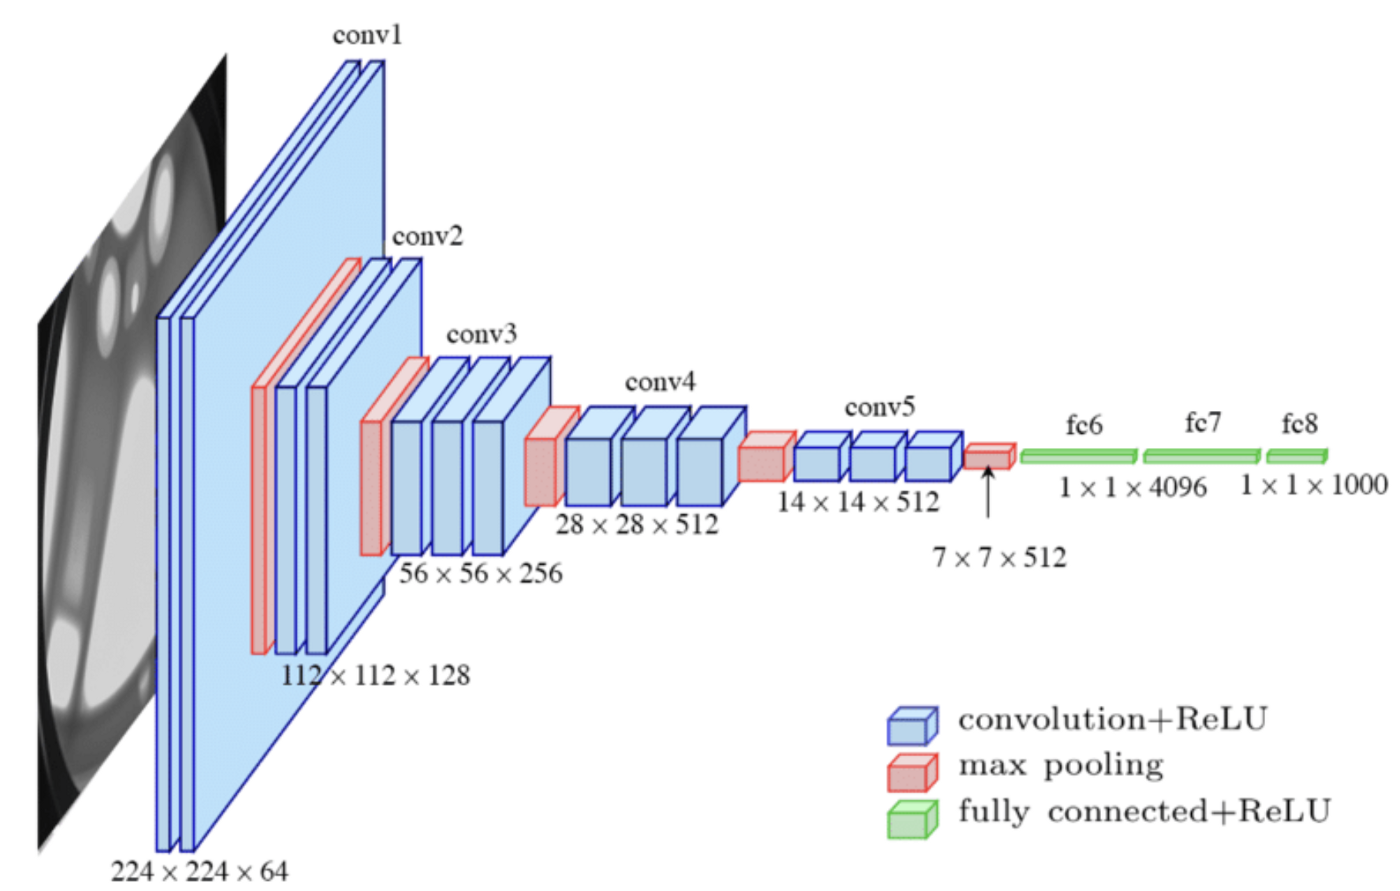

In [ ]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(include_top=False, input_shape=(64, 64, 3))
base_model.summary()

#### C.2 Add costum layers
I will define the final layers of the architecture. I will use a dropout layer to prevent overfitting of the convolutional base, a He normal initializer for the weights of the dense layer and a Softmax function to produce the multiclass output.

In [ ]:
class_count = len(class_names)
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=512, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(len(dfLabel), activation="softmax"))

model.summary()

#### C.3 Model compilation

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

#### C.4 Model fitting

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=30)

#### C.5 Assessing model performance

In [ ]:
plt.figure(figsize=(18, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
#plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
#plt.legend(["train", "test"], loc="upper left")
plt.legend(["train"], loc="upper left")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])
#plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
#plt.legend(["train", "test"], loc="upper left")

plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test, verbose=1)